In [8]:
#1.Use sklearn.neighbors.KNeighborsClassifier on the Iris dataset (only 2 features: sepal length, sepal width).
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]   # only sepal length & sepal width
y = iris.target


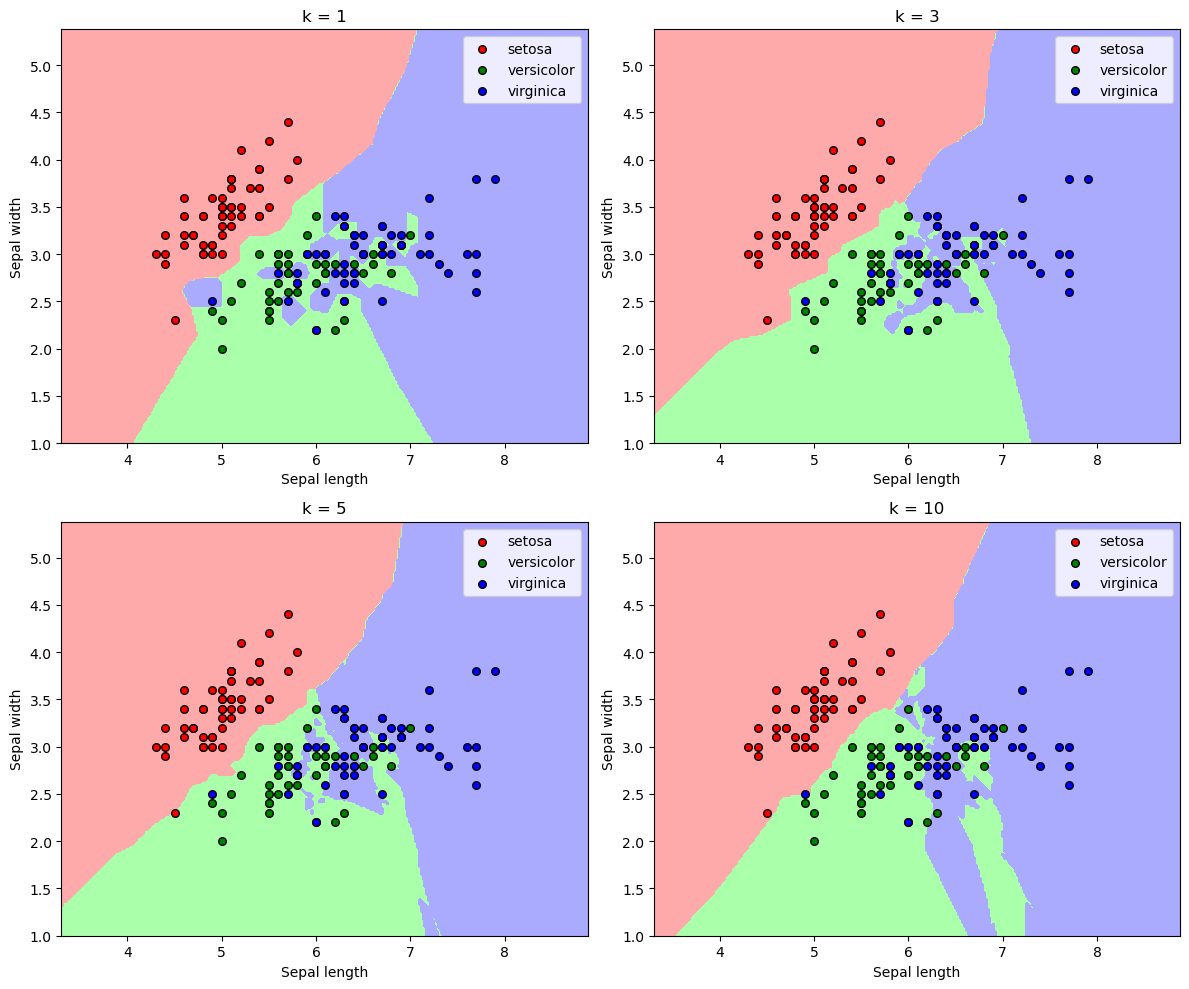

In [10]:
#2.Train models with k=1,3,5,10.
#3.Plot the decision boundaries for each k.
n_neighbors = [1, 3, 5, 10]

# Set color maps
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold  = ["red", "green", "blue"]

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for idx, k in enumerate(n_neighbors):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    
    # Step size in mesh
    h = .02  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax = axes[idx // 2, idx % 2]
    ax.contourf(xx, yy, Z, cmap=cmap_light)
    
    # Plot training points
    for i, color in zip(range(3), cmap_bold):
        ax.scatter(X[y == i, 0], X[y == i, 1],
                   c=color, label=iris.target_names[i],
                   edgecolor="k", s=30)
    
    ax.set_title(f"k = {k}")
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.legend()
    
plt.tight_layout()
plt.show()

In [ ]:
What you’ll see (Decision Boundaries):

k=1:
    ->Very jagged, irregular boundaries.
    ->Class regions follow training points closely.
    ->Model overfits.

k=3:
    ->Boundaries smoother, some noise reduced.
    ->Still captures local patterns.

k=5:
    ->Even smoother decision regions.
    ->Better generalization than k=1.

k=10:
    ->Very smooth, broad regions.
    ->May underfit — ignores finer distinctions.

In [ ]:
#4.Comment on how the boundaries change.
Comment:
As k increases, decision boundaries go from complex and jagged (overfitting) → to smooth and generalized (risk of underfitting). 
The choice of k is a trade-off between bias and variance.